In [1]:
%env ROS_IP=192.168.0.190
%env ROS_MASTER_URI=http://192.168.0.17:11311

!export ROS_MASTER_URI=http://192.168.0.17:11311
!export ROS_IP=192.168.0.190

!echo $ROS_IP
!echo $ROS_MASTER_URI


env: ROS_IP=192.168.0.190
env: ROS_MASTER_URI=http://192.168.0.17:11311
192.168.0.190
http://192.168.0.17:11311


In [2]:
from visioncraft.locobot.camera import LocobotCamera
from visioncraft.locobot.arm_control import LocobotArmControl
from geometry_msgs.msg import Pose
from tf.transformations import quaternion_from_euler
import numpy as np
import matplotlib.pyplot as plt


In [3]:
%env ROS_IP=192.168.0.190
%env ROS_MASTER_URI=http://192.168.0.17:11311

!export ROS_MASTER_URI=http://192.168.0.17:11311
!export ROS_IP=192.168.0.190

!echo $ROS_IP
!echo $ROS_MASTER_URI


env: ROS_IP=192.168.0.190
env: ROS_MASTER_URI=http://192.168.0.17:11311
192.168.0.190
http://192.168.0.17:11311


In [4]:
cam = LocobotCamera()


In [5]:
arm_control = LocobotArmControl(use_simulation=False)


[INFO] [1745959674.080684]: Waiting for joint trajectory action on /locobot/arm_controller/follow_joint_trajectory…
[INFO] [1745959674.897623]: Joint‐space action server ready
[INFO] [1745959676.793979709]: Loading robot model 'locobot'...
[INFO] [1745959676.793996336]: No root/virtual joint specified in SRDF. Assuming fixed joint


[WARN] [1745959676.572890300]: Link 'locobot/caster_back_link' is not known to URDF. Cannot disable/enable collisons.
[WARN] [1745959676.793325132]: Link 'locobot/caster_front_link' is not known to URDF. Cannot disable/enable collisons.
[WARN] [1745959676.793383261]: Link 'locobot/wheel_left_link' is not known to URDF. Cannot disable/enable collisons.
[WARN] [1745959676.793404817]: Link 'locobot/wheel_right_link' is not known to URDF. Cannot disable/enable collisons.
[WARN] [1745959676.793424888]: Link 'locobot/caster_back_link' is not known to URDF. Cannot disable/enable collisons.
[WARN] [1745959676.793438683]: Link 'locobot/caster_front_link' is not known to URDF. Cannot disable/enable collisons.
[WARN] [1745959676.793453298]: Link 'locobot/wheel_left_link' is not known to URDF. Cannot disable/enable collisons.
[WARN] [1745959676.793464343]: Link 'locobot/wheel_right_link' is not known to URDF. Cannot disable/enable collisons.
[WARN] [1745959676.793477007]: Link 'locobot/caster_back

RuntimeError: Unable to connect to move_group action server 'pickup' within allotted time (5s)

In [ ]:
arm_control.open_gripper()

In [ ]:
arm_control.close_gripper()

[WARN] [1745956018.817721]: ❌ No object detected before fully closed


In [ ]:
import numpy as np
from geometry_msgs.msg import Pose
from tf.transformations import quaternion_from_euler

# Create target poses
target_pose = Pose()
target_pose.position.x = 0.3
target_pose.position.y = -0.2
target_pose.position.z = 0.3

# Create a quaternion for (roll=0, pitch=-90°, yaw=0)
q = quaternion_from_euler(0, np.pi/2, 0)
target_pose.orientation.x = q[0]
target_pose.orientation.y = q[1]
target_pose.orientation.z = q[2]
target_pose.orientation.w = q[3]

# Execute the grab sequence
arm_control.go_to_pose(target_pose)  # Move to approach position


[WARN] [1745956028.302391]: MoveIt planning failed
[WARN] [1745956028.302178055]: Fail: ABORTED: TIMED_OUT


False

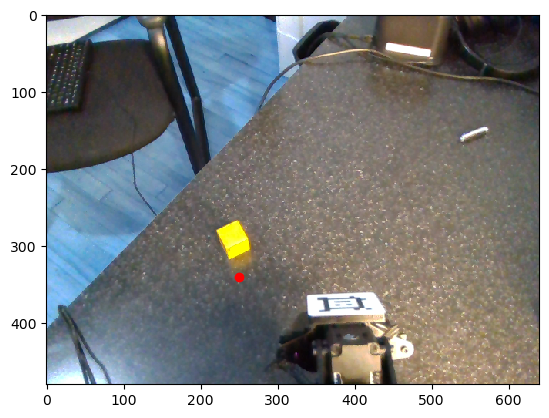

In [12]:
# Example: Grab cube at center of image
# cam.pan(0.0)
# cam.tilt(1.1)
height, width = cam.get_image().shape[:2]
center_x = 250
center_y = 340

plt.imshow(cam.get_image())
# add point on top of the image
plt.scatter(center_x, center_y, color='red')

In [14]:
point_camera = cam.get_point_at_pixel(center_x, center_y)
print(point_camera)

0.546


In [ ]:
# point_base = cam.get_target_coordinate_from_camera(cam.depth)


[ERROR] [1745956303.203633]: TF transform failed: arguments did not match any overloaded call:
  Vector(): too many arguments
  Vector(x: float, y: float, z: float): argument 1 has unexpected type 'numpy.ndarray'
  Vector(arg: Vector): argument 1 has unexpected type 'numpy.ndarray'


In [ ]:
from visioncraft.utils.transform_utils import transform_point_to_base_frame

In [16]:
u, v = center_x, center_y               # pixel coordinates
p_cam = cam.get_point_at_pixel(u, v)    # returns (x,y,z) or None
p_cam

0.54700005

In [18]:
cam.depth

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [24]:
point_base = transform_point_to_base_frame(cam.depth[center_x, center_y], source_frame="locobot/camera_depth_frame")

IndexError: invalid index to scalar variable.

In [ ]:
print(f"Point in base frame: {point_base}")

arm_control.pick(point_base, size=0.03)